
[]
0
0
Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.
Using 106 files for validation.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
(32, 180, 180, 3)
(32,)
Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Epoch 1/2
56/56 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.2097 - loss: 2.2609 - val_accuracy: 0.3413 - val_loss: 1.7935
Epoch 2/2
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3438 - loss: 1.7559 - val_accuracy: 0.3571 - val_loss: 1.5570
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1321 - loss: 2.4318    
Test Accuracy: 0.19
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step

Classification Report:

                            precision

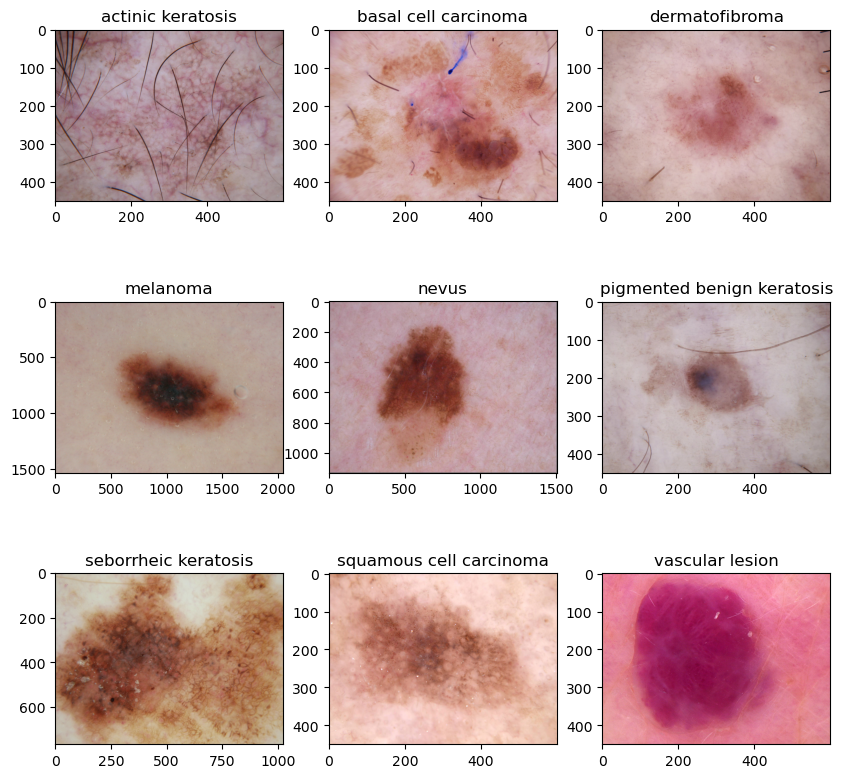

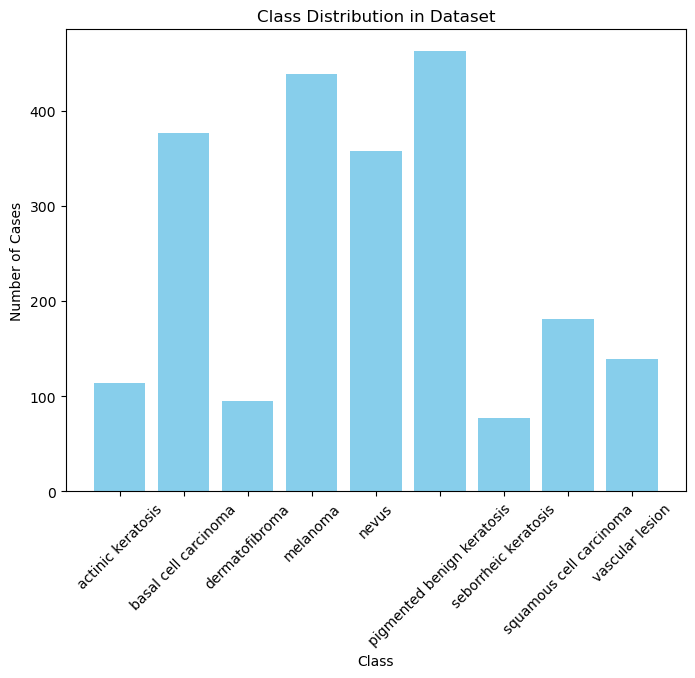

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


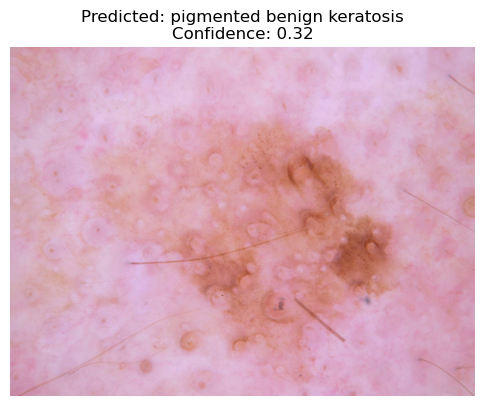

Predicted Class: pigmented benign keratosis with Confidence: 0.32


In [1]:
import tensorflow as tf
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)
    
# Set paths for training and testing datasets
data_dir_train = pathlib.Path("Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
train_dir = 'Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_dir = 'Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
image_count_train = len(list(data_dir_train.glob('Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024358.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025373.jpg')))
print(image_count_test)

# Data preprocessing
batch_size = 32
image_size = (224, 224)
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
    
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)
        
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split into 80% training and 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 2
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Plotting the number of cases in each class
def plot_class_distribution(directory):
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in os.listdir(directory)}
    plt.figure(figsize=(8, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title('Class Distribution in Dataset')
    plt.xlabel('Class')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_dir)

# Predict from an uploaded image
def predict_skin_cancer(image_path, model, class_labels):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    print(f"Predicted Class: {predicted_class_label} with Confidence: {confidence:.2f}")
    return predicted_class_label, confidence

# Predict from an uploaded image and display the image with prediction
def predict_and_display_skin_cancer(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {predicted_class_label}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_class_label} with Confidence: {confidence:.2f}")
    return predicted_class_label, confidence

# Example usage: Replace 'path_to_uploaded_image' with the image you want to test
image_path = 'Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025089.jpg'
predicted_label, confidence = predict_and_display_skin_cancer(image_path, model, class_labels)
